###  Image Classification and Recognition using PCA and SVM

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

%matplotlib inline

In [3]:
#pip install scikit-image

In [4]:
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [5]:
actor1=os.listdir('Vijay')

In [6]:
actor2=os.listdir('Surya')

In [7]:
actor3=os.listdir('Dhanush')

###  Reading image as matrix of numbers

In [8]:
#C:\Users\SN113\CSE-AI\Vijay

In [9]:
limit=10
vijay=[None]*limit
j=0
for i in actor1:
    if(j<limit):
        vijay[j]=imread('C:/Users/SN113/CSE-AI/Vijay/'+i)
        j+=1
    else:
        break
        
        

In [10]:
surya=[None]*limit
j=0
for i in actor2:
    if(j<limit):
        surya[j]=imread('C:/Users/SN113/CSE-AI/Surya/'+i)
        j+=1
    else:
        break

In [11]:
dhanush=[None]*limit
j=0
for i in actor3:
    if(j<limit):
        dhanush[j]=imread('C:/Users/SN113/CSE-AI/Dhanush/'+i)
        j+=1
    else:
        break

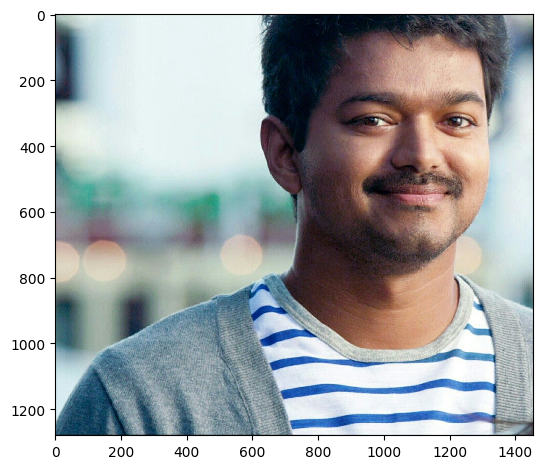

In [12]:
imshow(vijay[3])

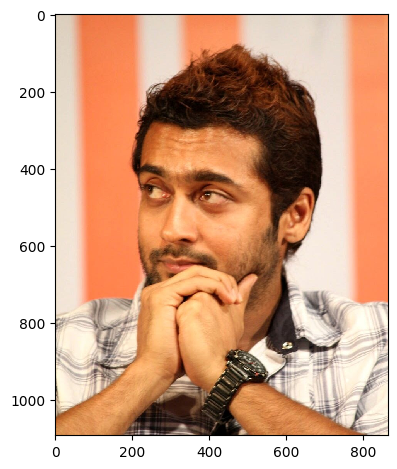

In [13]:
imshow(surya[9])

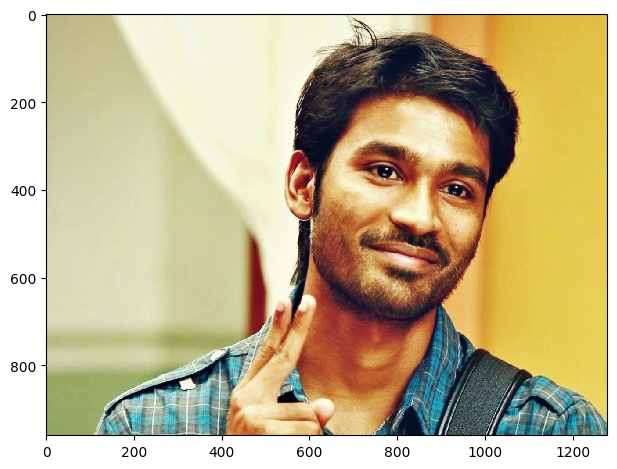

In [14]:
imshow(dhanush[3])

### Covert into greyscale

In [15]:
vijay_grey=[None]*limit
j=0
for i in actor1:
    if(j<limit):
        vijay_grey[j]=rgb2gray(vijay[j])
        j+=1
    else:
        break

In [16]:
surya_grey=[None]*limit
j=0
for i in actor2:
    if(j<limit):
        surya_grey[j]=rgb2gray(surya[j])
        j+=1
    else:
        break

In [17]:
dhanush_grey=[None]*limit
j=0
for i in actor3:
    if(j<limit):
        dhanush_grey[j]=rgb2gray(dhanush[j])
        j+=1
    else:
        break

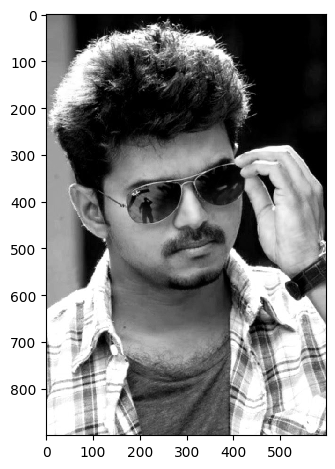

In [18]:
imshow(vijay_grey[4])

###  Matrix Resizing

In [19]:
for j in range(10):
    ce=vijay_grey[j]
    vijay_grey[j]=resize(ce,(500,500))

In [20]:
for j in range(10):
    cm=surya_grey[j]
    surya_grey[j]=resize(cm,(500,500))

In [21]:
for j in range(10):
    th=dhanush_grey[j]
    dhanush_grey[j]=resize(th,(500,500))

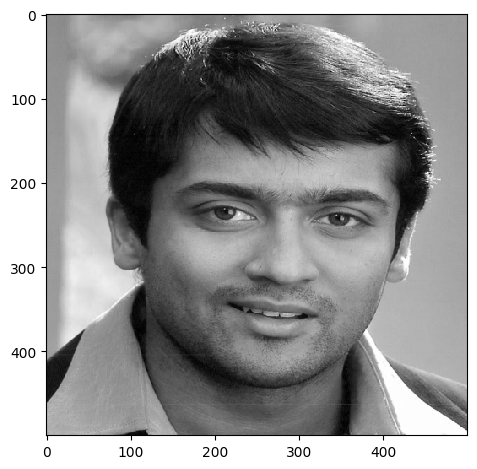

In [22]:
imshow(surya_grey[3])

### Flatten the image

In [23]:
image_size_vijay=vijay_grey[2].shape
image_size_vijay

(500, 500)

In [24]:
image_size_surya=surya_grey[2].shape
image_size_surya

(500, 500)

In [25]:
image_size_dhanush=dhanush_grey[2].shape
image_size_dhanush

(500, 500)

In [26]:
flatten_size_vijay=image_size_vijay[0]*image_size_vijay[1]
flatten_size_vijay

250000

In [27]:
flatten_size_surya=image_size_surya[0]*image_size_surya[1]
flatten_size_surya

250000

In [28]:
flatten_size_dhanush=image_size_dhanush[0]*image_size_dhanush[1]
flatten_size_dhanush

250000

In [29]:
length_of_images_vijay=len(vijay_grey)
length_of_images_vijay

10

In [30]:
length_of_images_surya=len(surya_grey)
length_of_images_surya

10

In [31]:
length_of_images_dhanush=len(dhanush_grey)
length_of_images_dhanush

10

In [32]:
for i in range(length_of_images_vijay):
    vijay_grey[i]=np.ndarray.flatten(vijay_grey[i]).reshape(flatten_size_vijay,1)

In [33]:
for i in range(length_of_images_surya):
    surya_grey[i]=np.ndarray.flatten(surya_grey[i]).reshape(flatten_size_surya,1)

In [34]:
for i in range(length_of_images_dhanush):
    dhanush_grey[i]=np.ndarray.flatten(dhanush_grey[i]).reshape(flatten_size_dhanush,1)

### Stack the array

In [35]:
vijay_grey=np.dstack(vijay_grey)
vijay_grey.shape

(250000, 1, 10)

In [36]:
surya_grey=np.dstack(surya_grey)
surya_grey.shape

(250000, 1, 10)

In [37]:
dhanush_grey=np.dstack(dhanush_grey)
dhanush_grey.shape

(250000, 1, 10)

In [38]:
vijay_grey=np.rollaxis(vijay_grey,axis=2,start=0)
vijay_grey.shape

(10, 250000, 1)

In [39]:
surya_grey=np.rollaxis(surya_grey,axis=2,start=0)
surya_grey.shape

(10, 250000, 1)

In [40]:
dhanush_grey=np.rollaxis(dhanush_grey,axis=2,start=0)
dhanush_grey.shape

(10, 250000, 1)

In [41]:
vijay_grey=vijay_grey.reshape(length_of_images_vijay,flatten_size_vijay)
vijay_grey.shape

(10, 250000)

In [42]:
surya_grey=surya_grey.reshape(length_of_images_surya,flatten_size_surya)
surya_grey.shape

(10, 250000)

In [43]:
dhanush_grey=dhanush_grey.reshape(length_of_images_dhanush,flatten_size_dhanush)
dhanush_grey.shape

(10, 250000)

In [44]:
vijay_data=pd.DataFrame(vijay_grey)
vijay_data['label']='vijay'
vijay_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.267688,0.267688,0.267688,0.267681,0.267188,0.267645,0.270517,0.271049,0.272073,0.282249,...,0.326597,0.412247,0.724750,0.820721,0.812228,0.829019,0.834280,0.820688,0.848839,vijay
1,0.244781,0.244495,0.244272,0.244450,0.248812,0.252053,0.257463,0.261487,0.264885,0.273006,...,0.699599,0.751003,0.795424,0.810885,0.823997,0.829755,0.842230,0.844181,0.845194,vijay
2,0.413583,0.423290,0.418131,0.409102,0.411407,0.411958,0.411949,0.408641,0.408037,0.408047,...,0.561815,0.555176,0.548272,0.549421,0.557570,0.554044,0.554195,0.551227,0.542271,vijay
3,0.733585,0.749809,0.763451,0.773051,0.771425,0.788122,0.779082,0.793065,0.788465,0.803212,...,0.363904,0.328572,0.306389,0.289404,0.268751,0.260208,0.262798,0.251410,0.233498,vijay
4,0.487732,0.487732,0.487732,0.487732,0.487732,0.487732,0.487732,0.487732,0.487732,0.487732,...,0.801166,0.770208,0.760892,0.638072,0.405354,0.366609,0.380669,0.403056,0.440131,vijay
5,0.483099,0.497217,0.516346,0.530164,0.542187,0.556391,0.568276,0.577162,0.586152,0.594609,...,0.039468,0.039468,0.039468,0.039468,0.039468,0.039468,0.039468,0.039468,0.039468,vijay
6,0.979169,0.980107,0.981714,0.983336,0.983052,0.983595,0.983488,0.983642,0.994094,0.994023,...,0.694357,0.691531,0.708839,0.697997,0.685707,0.685339,0.690585,0.699302,0.706506,vijay
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.975029,0.971706,0.967479,0.962070,0.953406,0.948512,0.945564,0.940672,0.937762,vijay
8,0.883908,0.888859,0.886706,0.878981,0.865858,0.875874,0.882075,0.873882,0.871646,0.872470,...,0.569432,0.578353,0.599819,0.632664,0.621788,0.568947,0.510206,0.462121,0.453447,vijay
9,0.883737,0.885016,0.882143,0.888805,0.890836,0.892742,0.891213,0.889397,0.891942,0.904798,...,0.170686,0.026958,0.026467,0.105632,0.168810,0.071530,0.072704,0.317553,0.432341,vijay


In [45]:
surya_data=pd.DataFrame(surya_grey)
surya_data['label']='surya'
surya_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.623659,0.619791,0.615739,0.613211,0.617383,0.617553,0.617553,0.617881,0.620620,0.620656,...,0.428372,0.427868,0.437284,0.428712,0.428704,0.431411,0.438953,0.410776,0.421143,surya
1,0.894275,0.894275,0.894275,0.894275,0.894275,0.894275,0.894275,0.894275,0.894758,0.894275,...,0.628927,0.637363,0.641148,0.640246,0.754385,0.897263,0.966863,0.929129,0.985430,surya
2,0.161886,0.162621,0.156452,0.147000,0.144893,0.136643,0.134856,0.121546,0.119831,0.115671,...,0.985225,0.964466,0.553538,0.189066,0.161126,0.142613,0.107984,0.106646,0.122654,surya
3,0.548518,0.548242,0.547643,0.547643,0.544764,0.544596,0.538871,0.548198,0.560906,0.550517,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,surya
4,0.499557,0.479328,0.485783,0.478090,0.482074,0.481812,0.480626,0.480310,0.480807,0.485261,...,0.255510,0.256704,0.249417,0.273901,0.357166,0.243146,0.238140,0.227575,0.280654,surya
5,0.756863,0.756863,0.756863,0.756863,0.756863,0.756854,0.756826,0.753561,0.752913,0.752502,...,0.569440,0.552173,0.543437,0.502059,0.522515,0.486299,0.497108,0.508115,0.471055,surya
6,0.360181,0.360133,0.361113,0.365427,0.367976,0.363690,0.355119,0.355256,0.352921,0.348664,...,0.087207,0.083561,0.076435,0.072316,0.064960,0.061018,0.061247,0.066273,0.074519,surya
7,0.146328,0.139818,0.131228,0.125643,0.114656,0.110988,0.112514,0.103365,0.101598,0.099897,...,0.261571,0.280623,0.277164,0.270113,0.255312,0.239999,0.233747,0.245261,0.245047,surya
8,0.155161,0.152693,0.151345,0.151334,0.151400,0.152103,0.149130,0.150885,0.151289,0.151334,...,0.075947,0.073167,0.074712,0.076478,0.072978,0.066307,0.073290,0.072229,0.074575,surya
9,0.809129,0.808453,0.811905,0.810844,0.810767,0.812782,0.811679,0.811672,0.811627,0.801822,...,0.931902,0.940049,0.948532,0.956015,0.956152,0.955860,0.951901,0.952438,0.949438,surya


In [46]:
dhanush_data=pd.DataFrame(dhanush_grey)
dhanush_data['label']='dhanush'
dhanush_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.120935,0.124317,0.120726,0.111403,0.121982,0.152058,0.140566,0.132693,0.143929,0.146985,...,0.248475,0.262464,0.258098,0.258550,0.251087,0.241895,0.230479,0.229809,0.229809,dhanush
1,0.817553,0.812718,0.809309,0.811115,0.818367,0.829259,0.831318,0.825563,0.836200,0.854041,...,0.338487,0.350644,0.354061,0.354262,0.376748,0.410720,0.462189,0.572363,0.703817,dhanush
2,0.163031,0.163031,0.163031,0.163124,0.169426,0.145680,0.146287,0.132738,0.123173,0.121928,...,0.290879,0.310245,0.468227,0.949935,0.728008,0.269845,0.249206,0.275651,0.299572,dhanush
3,0.701054,0.701044,0.700995,0.701027,0.701072,0.700909,0.701672,0.701423,0.697720,0.701727,...,0.448216,0.504340,0.531274,0.645607,0.648930,0.535295,0.555782,0.538128,0.477303,dhanush
4,0.125908,0.124268,0.123034,0.120195,0.120280,0.118286,0.118307,0.119564,0.119179,0.121930,...,0.067675,0.065222,0.060932,0.059674,0.054407,0.053892,0.050997,0.050981,0.050980,dhanush
5,0.663948,0.663948,0.663948,0.663948,0.663948,0.663948,0.666148,0.666380,0.665905,0.667554,...,0.455805,0.477333,0.465287,0.451499,0.451685,0.410356,0.410914,0.407002,0.396297,dhanush
6,0.044818,0.047043,0.049159,0.049891,0.051002,0.050975,0.048756,0.046506,0.050545,0.053846,...,0.235793,0.262462,0.584331,0.346115,0.578742,0.764722,0.525459,0.384000,0.590498,dhanush
7,0.324214,0.317212,0.313132,0.316685,0.319354,0.309211,0.294338,0.292494,0.281594,0.259968,...,0.174236,0.171423,0.158521,0.161532,0.161689,0.157360,0.150128,0.144779,0.136732,dhanush
8,0.453472,0.453638,0.454037,0.452306,0.451514,0.451514,0.453891,0.461114,0.458456,0.448403,...,0.873834,0.872683,0.868638,0.867695,0.870319,0.870319,0.870319,0.870319,0.870319,dhanush
9,0.156676,0.172198,0.177146,0.167560,0.160868,0.166896,0.170870,0.176003,0.178440,0.178588,...,0.248431,0.212322,0.149393,0.118576,0.115814,0.093508,0.072603,0.062040,0.073941,dhanush


In [47]:
actor_1=pd.concat([vijay_data,surya_data])

In [48]:
actor=pd.concat([dhanush_data,actor_1])
actor

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.120935,0.124317,0.120726,0.111403,0.121982,0.152058,0.140566,0.132693,0.143929,0.146985,...,0.248475,0.262464,0.258098,0.258550,0.251087,0.241895,0.230479,0.229809,0.229809,dhanush
1,0.817553,0.812718,0.809309,0.811115,0.818367,0.829259,0.831318,0.825563,0.836200,0.854041,...,0.338487,0.350644,0.354061,0.354262,0.376748,0.410720,0.462189,0.572363,0.703817,dhanush
2,0.163031,0.163031,0.163031,0.163124,0.169426,0.145680,0.146287,0.132738,0.123173,0.121928,...,0.290879,0.310245,0.468227,0.949935,0.728008,0.269845,0.249206,0.275651,0.299572,dhanush
3,0.701054,0.701044,0.700995,0.701027,0.701072,0.700909,0.701672,0.701423,0.697720,0.701727,...,0.448216,0.504340,0.531274,0.645607,0.648930,0.535295,0.555782,0.538128,0.477303,dhanush
4,0.125908,0.124268,0.123034,0.120195,0.120280,0.118286,0.118307,0.119564,0.119179,0.121930,...,0.067675,0.065222,0.060932,0.059674,0.054407,0.053892,0.050997,0.050981,0.050980,dhanush
5,0.663948,0.663948,0.663948,0.663948,0.663948,0.663948,0.666148,0.666380,0.665905,0.667554,...,0.455805,0.477333,0.465287,0.451499,0.451685,0.410356,0.410914,0.407002,0.396297,dhanush
6,0.044818,0.047043,0.049159,0.049891,0.051002,0.050975,0.048756,0.046506,0.050545,0.053846,...,0.235793,0.262462,0.584331,0.346115,0.578742,0.764722,0.525459,0.384000,0.590498,dhanush
7,0.324214,0.317212,0.313132,0.316685,0.319354,0.309211,0.294338,0.292494,0.281594,0.259968,...,0.174236,0.171423,0.158521,0.161532,0.161689,0.157360,0.150128,0.144779,0.136732,dhanush
8,0.453472,0.453638,0.454037,0.452306,0.451514,0.451514,0.453891,0.461114,0.458456,0.448403,...,0.873834,0.872683,0.868638,0.867695,0.870319,0.870319,0.870319,0.870319,0.870319,dhanush
9,0.156676,0.172198,0.177146,0.167560,0.160868,0.166896,0.170870,0.176003,0.178440,0.178588,...,0.248431,0.212322,0.149393,0.118576,0.115814,0.093508,0.072603,0.062040,0.073941,dhanush


In [49]:
from sklearn.utils import shuffle

ModuleNotFoundError: No module named 'sklearn'